In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
electricity_prices = pd.read_csv('prices.csv')
electricity_prices.head()


FileNotFoundError: ignored

In [ ]:
#concatenate the dates and hours columns 
electricity_prices['time'] = electricity_prices['dates'] + ' ' + electricity_prices['hours']
electricity_prices.head()


,dates,hours,prices,time
0,01.10.2018,00:00,59.53,01.10.2018 00:00
1,01.10.2018,01:00,56.10,01.10.2018 01:00
2,01.10.2018,02:00,51.41,01.10.2018 02:00
3,01.10.2018,03:00,47.38,01.10.2018 03:00
4,01.10.2018,04:00,47.59,01.10.2018 04:00


In [ ]:
electricity_prices['dates']
print('/n')
electricity_prices['hours']
print('/n')
electricity_prices['time']

/n
/n


0        01.10.2018 00:00
1        01.10.2018 01:00
2        01.10.2018 02:00
3        01.10.2018 03:00
4        01.10.2018 04:00
               ...       
26299    30.09.2021 19:00
26300    30.09.2021 20:00
26301    30.09.2021 21:00
26302    30.09.2021 22:00
26303    30.09.2021 23:00
Name: time, Length: 26304, dtype: object

In [ ]:
electricity_prices.drop(['dates', 'hours'], axis=1, inplace=True)
electricity_prices.head()

,prices,time
0,59.53,01.10.2018 00:00
1,56.10,01.10.2018 01:00
2,51.41,01.10.2018 02:00
3,47.38,01.10.2018 03:00
4,47.59,01.10.2018 04:00


In [ ]:
#export in csv file 
electricity_prices.to_csv('new_prices.csv')

In [ ]:
#importation and work in progress on the new csv 
prices = pd.read_csv('new_prices.csv', index_col='time', parse_dates = ['time'])
prices.head()

,Unnamed: 0,prices
time,,
2018-01-10 00:00:00,0,59.53
2018-01-10 01:00:00,1,56.10
2018-01-10 02:00:00,2,51.41
2018-01-10 03:00:00,3,47.38
2018-01-10 04:00:00,4,47.59


In [ ]:
prices.drop('Unnamed: 0', axis = 1, inplace = True)
prices.head()

,prices
time,
2018-01-10 00:00:00,59.53
2018-01-10 01:00:00,56.10
2018-01-10 02:00:00,51.41
2018-01-10 03:00:00,47.38
2018-01-10 04:00:00,47.59


<AxesSubplot:title={'center':'Evolution of the electricity price in January 2018'}, xlabel='time', ylabel='Electricity price'>

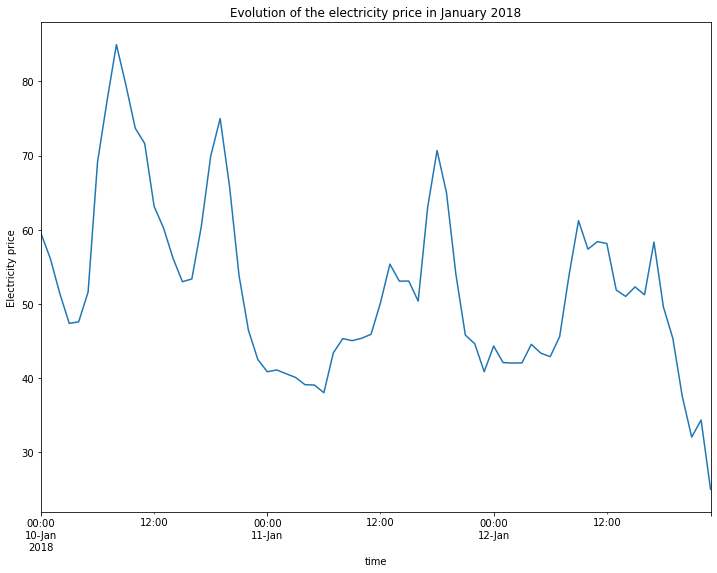

In [ ]:
prices.loc['2018-01-01':'2018-01-30','prices'].plot(figsize=(12,9), ylabel= 'Electricity price', title='Evolution of the electricity price in January 2018')

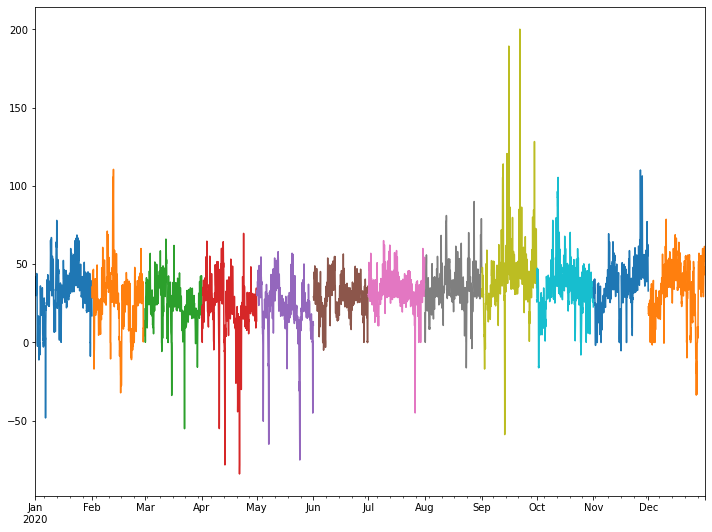

In [ ]:
prices.loc['2020', 'prices'].resample('M').plot(figsize=(12,9))
plt.show()

In [ ]:
prices.index

DatetimeIndex(['2018-01-10 00:00:00', '2018-01-10 01:00:00',
               '2018-01-10 02:00:00', '2018-01-10 03:00:00',
               '2018-01-10 04:00:00', '2018-01-10 05:00:00',
               '2018-01-10 06:00:00', '2018-01-10 07:00:00',
               '2018-01-10 08:00:00', '2018-01-10 09:00:00',
               ...
               '2021-09-30 14:00:00', '2021-09-30 15:00:00',
               '2021-09-30 16:00:00', '2021-09-30 17:00:00',
               '2021-09-30 18:00:00', '2021-09-30 19:00:00',
               '2021-09-30 20:00:00', '2021-09-30 21:00:00',
               '2021-09-30 22:00:00', '2021-09-30 23:00:00'],
              dtype='datetime64[ns]', name='time', length=26304, freq=None)

In [ ]:
prices.shape

(26304, 1)

In [ ]:
prices.shape[0]/(365*24)

3.0027397260273974

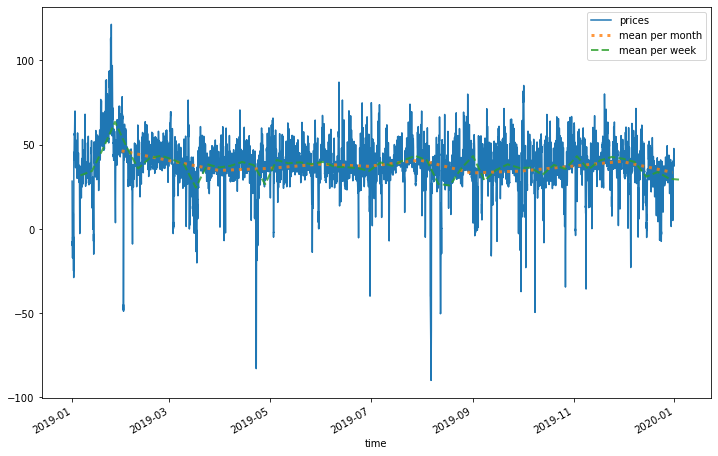

In [ ]:


plt.figure(figsize=(12, 8))
prices.loc['2019', 'prices'].plot()
prices.loc['2019', 'prices'].resample('M').mean().plot(label='mean per month', lw=3, ls=':', alpha=0.8)
prices.loc['2019', 'prices'].resample('W').mean().plot(label='mean per week', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()



In [ ]:
#missing values for 2018 : work only on data from 2019 to 2021 : 2019-2020 : train and 2021 : test
data = prices['2019':]
data.head()

,prices
time,
2019-01-01 00:00:00,28.32
2019-01-01 01:00:00,10.07
2019-01-01 02:00:00,-4.08
2019-01-01 03:00:00,-9.91
2019-01-01 04:00:00,-7.41


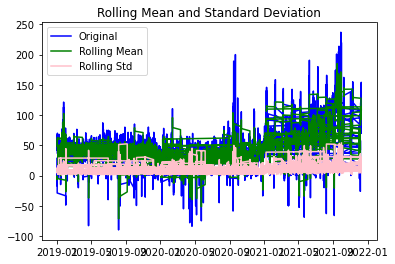

Results of dickey fuller test
Test Statistics               -7.621841e+00
p-value                        2.118316e-11
No. of lags used               4.800000e+01
Number of observations used    2.404600e+04
critical value (1%)           -3.430622e+00
critical value (5%)           -2.861660e+00
critical value (10%)          -2.566834e+00
dtype: float64


In [ ]:
#test of the stationnarity of the distribution
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='green', label='Rolling Mean')
    plt.plot(rolstd, color='pink', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity((data['prices']))

p_value<5% ==> stationnary data

In [ ]:
data_copy = data.copy()
data_copy.head()

,prices
time,
2019-01-01 00:00:00,28.32
2019-01-01 01:00:00,10.07
2019-01-01 02:00:00,-4.08
2019-01-01 03:00:00,-9.91
2019-01-01 04:00:00,-7.41


In [ ]:
data.dtypes

prices    float64
dtype: object

                     prices
time                       
2019-01-01 00:00:00   28.32
2019-01-01 01:00:00   10.07
2019-01-01 02:00:00   -4.08
2019-01-01 03:00:00   -9.91
2019-01-01 04:00:00   -7.41
                     prices
time                       
2021-01-01 00:00:00   50.87
2021-01-01 01:00:00   48.19
2021-01-01 02:00:00   44.68
2021-01-01 03:00:00   42.92
2021-01-01 04:00:00   40.39


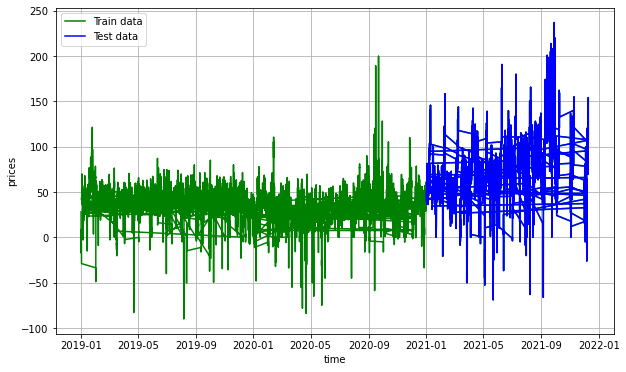

In [ ]:


#train_data, test_data = data[3:int(len(data)*0.9)], data[int(len(data)*0.9):]
#### ==> not possible to use it : some values are the smae in the train set and the test set 
train_data = data.loc['2019':'2020']
print(train_data.head())
test_data = data.loc['2021':]
print(test_data.head())
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('time')
plt.ylabel('prices')
plt.plot(data, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()



In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:


model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
test='adf',       # use adftest to find optimal 'd'
max_p=8, max_q=3, # maximum p and q
m=1,              # frequency of series
d=None,           # let model determine 'd'
seasonal=False,   # No Seasonality
start_P=0, 
D=0, 
trace=True,
error_action='ignore',  
suppress_warnings=True, 
stepwise=True)
print(model_autoARIMA.summary())



Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=177459.726, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=109098.563, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=155397.333, Time=0.76 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=105922.931, Time=0.59 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=105870.722, Time=0.83 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=105628.305, Time=1.14 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=105415.116, Time=1.38 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=105163.880, Time=1.58 sec
 ARIMA(7,0,0)(0,0,0)[0]             : AIC=inf, Time=1.99 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=104483.767, Time=8.39 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=104489.082, Time=5.80 sec
 ARIMA(7,0,1)(0,0,0)[0]             : AIC=104496.489, Time=9.61 sec
 ARIMA(6,0,2)(0,0,0)[0]             : AIC=inf, Time=12.71 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=104491.718, Time=12.05 sec
 ARIMA(7,0,2)(0,0

In [ ]:
model = ARIMA(train_data['prices'], order=(8, 0, 1))
fitted = model.fit()
print(fitted.summary())

C:\Users\acvil\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\acvil\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency

                              ARMA Model Results                              
Dep. Variable:                 prices   No. Observations:                17544
Model:                     ARMA(8, 1)   Log Likelihood              -52113.309
Method:                       css-mle   S.D. of innovations              4.718
Date:                Sat, 04 Dec 2021   AIC                         104248.618
Time:                        21:55:07   BIC                         104334.116
Sample:                             0   HQIC                        104276.769
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           34.0695      0.841     40.493      0.000      32.420      35.718
ar.L1.prices     1.7824      0.035     50.625      0.000       1.713       1.851
ar.L2.prices    -0.9958      0.049    -20.52

In [ ]:
start = len(train_data)
end = start + len(test_data) -1
params = np.array([8,0,1])
pred = model.predict(params = params, start = start, end = end)
print(pred.shape)

C:\Users\acvil\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


ValueError: could not broadcast input array from shape (0,1) into shape (1,1)

In [ ]:
pred.shape

In [ ]:
test_data.shape

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mean = test_data['prices'].mean()
rmse=sqrt(mean_squared_error(pred,test_data['prices']))
print('RMSE' + rmse)
print('Mean' + mean)
print(rmse/mean)